# Exploratory Data Analysis



### Roles to Explore:

In [25]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading Data
df =load_dataset('lukebarousse/data_jobs', split='train').to_pandas()

#data cleanup
df['job_posted_date'] =pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

import seaborn as sns



### Filter for US Data Analyst roles

In [ ]:
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

### You know what, lets explore roles in Ghana

#### Checking to see if there is any Data on Ghana...

In [15]:
'Ghana' in df['job_country'].unique()

True

### Filtering for Data Analyst Roles in Ghana

In [ ]:
df_DA_Gh = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Ghana')]
df_DA_Gh

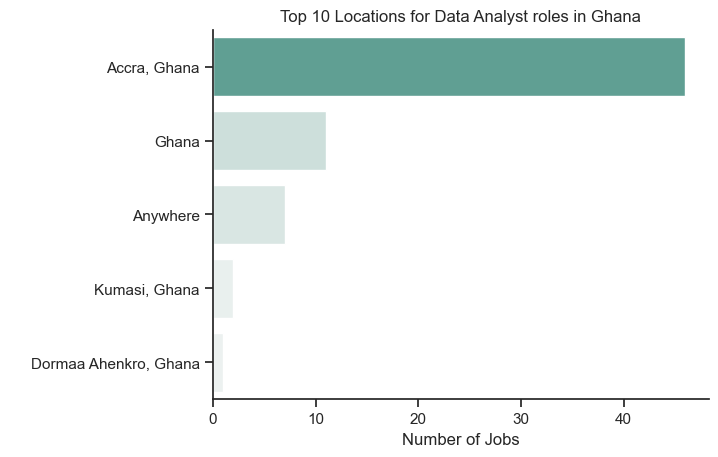

In [67]:
df_plot = df_DA_Gh['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='light:#5A9', legend=False)
sns.despine()
plt.title('Top 10 Locations for Data Analyst roles in Ghana')
plt.ylabel(' ')
plt.xlabel('Number of Jobs')
plt.show()


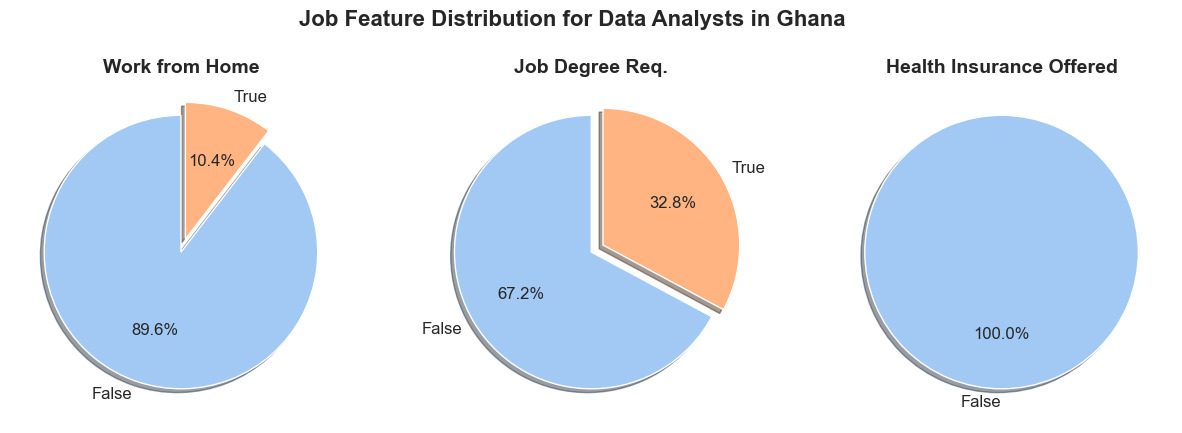

In [57]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'

}

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((15, 5))

colors = sns.color_palette("pastel")  # Using Seaborn color palette

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_Gh[column].value_counts()
    labels = counts.index.tolist()  # Get dynamic labels

    # Explode the 'True' slice (if it exists)
    explode = [0.1 if label is True else 0 for label in labels]

    ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
              colors=colors[:len(labels)], explode=explode, shadow=True, textprops={'fontsize': 12})
    ax[i].set_title(title, fontsize=14, fontweight="bold")

plt.suptitle('Job Feature Distribution for Data Analysts in Ghana', fontsize=16, fontweight="bold")
plt.show()


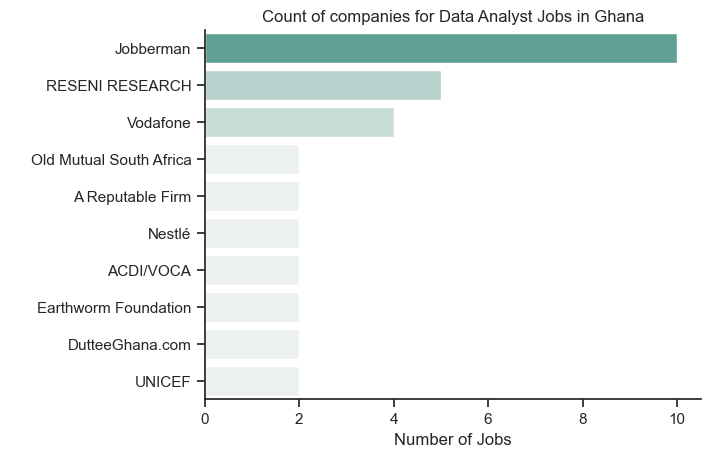

In [63]:
df_plot = df_DA_Gh['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='light:#5A9', legend=False)
sns.despine()
plt.title('Count of companies for Data Analyst Jobs in Ghana')
plt.ylabel(' ')
plt.xlabel('Number of Jobs')
plt.show()
